<a href="https://colab.research.google.com/github/Kim-Hyerin/pdm06/blob/master/py-pandas/pandas_3_harnessing_df_pdm06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20200928', periods=6)
dates

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')

In [8]:
# head()
np.random.seed(1234) # 무작위 값 일치시키기
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-09-28,0.471435,-1.190976,1.432707,-0.312652
2020-09-29,-0.720589,0.887163,0.859588,-0.636524
2020-09-30,0.015696,-2.242685,1.150036,0.991946
2020-10-01,0.953324,-2.021255,-0.334077,0.002118
2020-10-02,0.405453,0.289092,1.321158,-1.546906
2020-10-03,-0.202646,-0.655969,0.193421,0.553439




---



### 데이터 재구성(setting) 또는 확장

In [9]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20200928', periods=6))
s1

2020-09-28    1
2020-09-29    2
2020-09-30    3
2020-10-01    4
2020-10-02    5
2020-10-03    6
Freq: D, dtype: int64

In [12]:
df['F'] = s1 #F열 추가

In [13]:
df  # 기존 df의 구조에 맞춰서 확장, 재구성됨.

,A,B,C,D,F
2020-09-28,0.471435,-1.190976,1.432707,-0.312652,1
2020-09-29,-0.720589,0.887163,0.859588,-0.636524,2
2020-09-30,0.015696,-2.242685,1.150036,0.991946,3
2020-10-01,0.953324,-2.021255,-0.334077,0.002118,4
2020-10-02,0.405453,0.289092,1.321158,-1.546906,5
2020-10-03,-0.202646,-0.655969,0.193421,0.553439,6


#### Setting data by label

> **at, iat**

- at : label을 이용하여 값 지정
- iat: index를 이용하여 값 지정

In [15]:
# Setting values by label:
df.at[dates[0],'A'] = 0 # 오늘이면서 A열인 값을 0으로 변경
df

,A,B,C,D,F
2020-09-28,0.000000,-1.190976,1.432707,-0.312652,1
2020-09-29,-0.720589,0.887163,0.859588,-0.636524,2
2020-09-30,0.015696,-2.242685,1.150036,0.991946,3
2020-10-01,0.953324,-2.021255,-0.334077,0.002118,4
2020-10-02,0.405453,0.289092,1.321158,-1.546906,5
2020-10-03,-0.202646,-0.655969,0.193421,0.553439,6


In [17]:
# Setting values by position (index):
df.iat[0,1] = 0 # 1행 B열 값을 0으로 변경
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,-0.312652,1
2020-09-29,-0.720589,0.887163,0.859588,-0.636524,2
2020-09-30,0.015696,-2.242685,1.150036,0.991946,3
2020-10-01,0.953324,-2.021255,-0.334077,0.002118,4
2020-10-02,0.405453,0.289092,1.321158,-1.546906,5
2020-10-03,-0.202646,-0.655969,0.193421,0.553439,6


In [19]:
# Important properties of DataFrame
len(df), df.shape, df.size # 행 개수, 행열, 모든df갯수

(6, (6, 5), 30)

In [21]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df)) # 전체 행의 D열을 모두 5로 변경
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


### Missing data 처리
> pandas primarily uses the value **np.nan** to represent missing data. 
- dropna() # 제대로 된 숫자가 아닌 것을 drop
- fillna() # 숫자가 아닌 다른 것들을 채운다
- isna() # 숫자가 아닌 것들을 확인한다

In [22]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [23]:
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


In [26]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) # 새롭게 인덱싱, 오늘~4일,E열 확장
df1

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,NaN
2020-09-29,-0.720589,0.887163,0.859588,5,2,NaN
2020-09-30,0.015696,-2.242685,1.150036,5,3,NaN
2020-10-01,0.953324,-2.021255,-0.334077,5,4,NaN


In [28]:
df1.loc[dates[0]:dates[1],'E'] = 1 # 오늘~내일 E열 값을 1로 준다.
df1

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,1.0
2020-09-29,-0.720589,0.887163,0.859588,5,2,1.0
2020-09-30,0.015696,-2.242685,1.150036,5,3,NaN
2020-10-01,0.953324,-2.021255,-0.334077,5,4,NaN


## Drop missing data from DataFrame

In [30]:
# To drop any rows that have missing data.
df1.dropna(how='any') # 숫자가 아닌 행 들을 drop

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,1.0
2020-09-29,-0.720589,0.887163,0.859588,5,2,1.0


In [32]:
# Filling missing data.
df1.fillna(value=5) # 숫자가 아닌 값을 5로 채운다

,A,B,C,D,F,E
2020-09-28,0.000000,0.000000,1.432707,5,1,1.0
2020-09-29,-0.720589,0.887163,0.859588,5,2,1.0
2020-09-30,0.015696,-2.242685,1.150036,5,3,5.0
2020-10-01,0.953324,-2.021255,-0.334077,5,4,5.0


In [34]:
# Get the boolean mask where values are nan.
pd.isna(df1) # 데이터 값이 NaN인 것을 찾아낸다

,A,B,C,D,F,E
2020-09-28,False,False,False,False,False,False
2020-09-29,False,False,False,False,False,False
2020-09-30,False,False,False,False,False,True
2020-10-01,False,False,False,False,False,True




---



### 데이터 통계 (Statistics)

In [35]:
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


In [39]:
df.mean() # 열 들의 평균

A    0.075206
B   -0.623942
C    0.770472
D    5.000000
F    3.500000
dtype: float64

In [41]:
df.mean(0) # axis=0

A    0.075206
B   -0.623942
C    0.770472
D    5.000000
F    3.500000
dtype: float64

In [44]:
df.mean(1) # axis=1 # 가로로 평균

2020-09-28    1.486541
2020-09-29    1.605233
2020-09-30    1.384609
2020-10-01    1.519598
2020-10-02    2.403141
2020-10-03    2.066961
Freq: D, dtype: float64

In [45]:
df.std(0) #, df.std(1)

A    0.565658
B    1.271236
C    0.699548
D    0.000000
F    1.870829
dtype: float64

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D,E

In [47]:
import numpy as np
import matplotlib.pyplot as plt
# 노트북 셀 내에 그림 출력 (Jupyter notebook or lab)
# %matplotlib inline

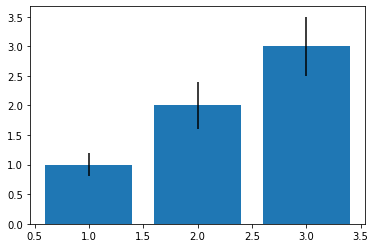

In [53]:
# 막대그래프(bar graph)를 그린다.
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
x_pos = list(range(1,len(bar_labels)+1))
plt.bar(x_pos, means, yerr=stddevs)

plt.show()

In [55]:
df

,A,B,C,D,F
2020-09-28,0.000000,0.000000,1.432707,5,1
2020-09-29,-0.720589,0.887163,0.859588,5,2
2020-09-30,0.015696,-2.242685,1.150036,5,3
2020-10-01,0.953324,-2.021255,-0.334077,5,4
2020-10-02,0.405453,0.289092,1.321158,5,5
2020-10-03,-0.202646,-0.655969,0.193421,5,6


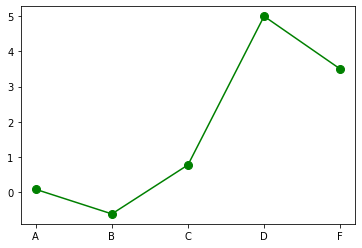

In [57]:
plt.plot(df.mean(0), '-go', ms=8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


<BarContainer object of 5 artists>

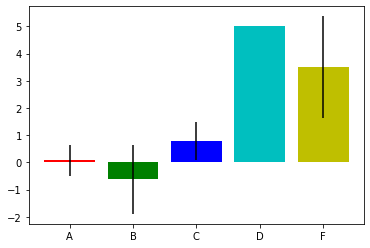

In [59]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')

***